**Introduction to networkx**

In [145]:
import networkx as nx
import community as c

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import operator

**Graph objects**
We'll start by creating and empty graph object G. The graph is `undirected`

In [161]:
G = nx.Graph()

The network can be created by adding edges and nodes to the G

In [163]:
G.add_edge("Belgium", "France")
G.add_edge("Belgium", "Netherlands")
G.add_edge("Belgium","Germany")
G.add_edge("Belgium", "Luxemburg")
G.add_edge("Germany","France")
G.add_edge("Germany","Luxemburg")
G.add_edge("France","Spain")
G.add_edge("Spain","Portugal")

Listing all the nodes

In [164]:
G.nodes()

NodeView(('Belgium', 'France', 'Netherlands', 'Germany', 'Luxemburg', 'Spain', 'Portugal'))

Listing all the edges

In [165]:
G.edges()

EdgeView([('Belgium', 'France'), ('Belgium', 'Netherlands'), ('Belgium', 'Germany'), ('Belgium', 'Luxemburg'), ('France', 'Germany'), ('France', 'Spain'), ('Germany', 'Luxemburg'), ('Spain', 'Portugal')])

**Layouts**
<br>
There are different ways to visualize our Graph

Text(0.5, 1.0, 'Spectral')

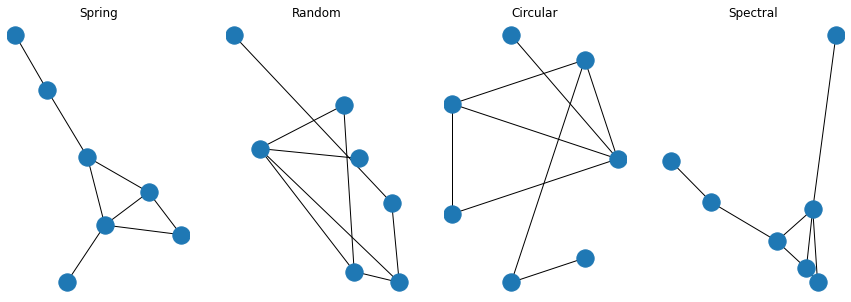

In [169]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
nx.draw_spring(G,ax=ax[0])
ax[0].set_title('Spring')

nx.draw_random(G,ax=ax[1])
ax[1].set_title('Random')

nx.draw_circular(G,ax=ax[2])
ax[2].set_title('Circular')

nx.draw_spectral(G,ax=ax[3])
ax[3].set_title('Spectral')

**Degree Centrality**

In [170]:
cent = nx.degree_centrality(G)
sorted_x = sorted(cent.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('Belgium', 0.6666666666666666),
 ('France', 0.5),
 ('Germany', 0.5),
 ('Luxemburg', 0.3333333333333333),
 ('Spain', 0.3333333333333333),
 ('Netherlands', 0.16666666666666666),
 ('Portugal', 0.16666666666666666)]

**Betweenness Centrality**

In [171]:
cent = nx.betweenness_centrality(G)
sorted_x = sorted(cent.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

[('France', 0.5333333333333333),
 ('Belgium', 0.43333333333333335),
 ('Spain', 0.3333333333333333),
 ('Germany', 0.1),
 ('Netherlands', 0.0),
 ('Luxemburg', 0.0),
 ('Portugal', 0.0)]

**Communities**

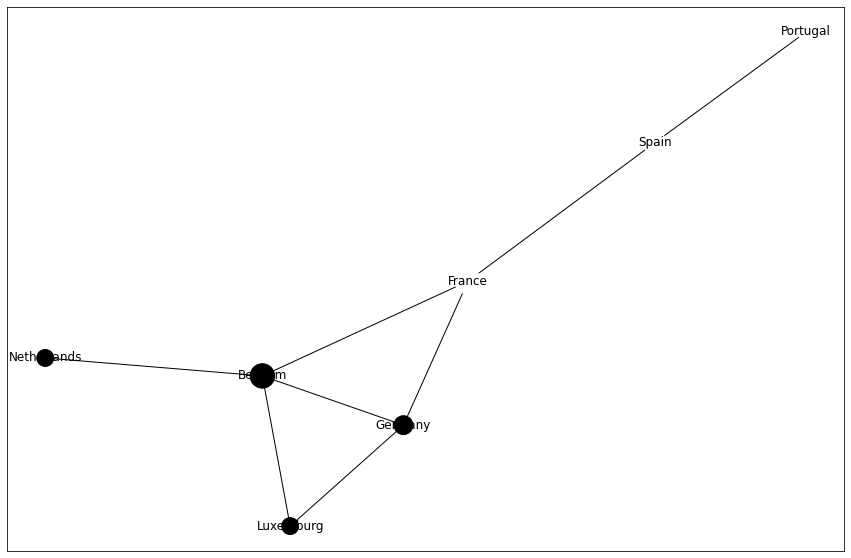

<Figure size 1440x1440 with 0 Axes>

In [177]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

parts = c.best_partition(G)

values = [parts.get(node) for node in G.nodes()]

pos = nx.spring_layout(G)

betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)

node_size =  [v * 1000 for v in betCent.values()]

plt.figure(figsize=(20,20))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=True,
                 node_color=values,
                 node_size=node_size,
                 cmap=plt.cm.bone,
                ax=ax)

In [178]:
df = pd.concat([pd.DataFrame(G.nodes()),pd.DataFrame(values)],axis=1)
df.columns = ['country','community']
df.set_index('country',inplace=True)


In [179]:
df_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
df_betweenness.columns=['betweenness']
df = pd.concat([df,df_betweenness],axis=1)

In [160]:
df

,community,betweenness
country,,
Belgium,0,0.595238
France,1,0.666667
Netherlands,0,0.285714
Germany,0,0.357143
Luxemburg,0,0.285714
Spain,1,0.523810
Portugal,1,0.285714
